# GA Data Science (DAT18) - Lab 13
## Pair Programming

### Heart Disease Dataset
ref: [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

#### Features

    Dataset has 76 total attributes - 14 attributes are used:
    1. #3 (age)
    2. #4 (sex)
    3. #9 (cp)
    4. #10 (trestbps)
    5. #12 (chol)
    6. #16 (fbs)
    7. #19 (restecg)
    8. #32 (thalach)
    9. #38 (exang)
    10. #40 (oldpeak)
    11. #41 (slope)
    12. #44 (ca)
    13. #51 (thal)
    14. #58 (num) (the predicted attribute - 0 is healthy and 1,2,3,4 indicate heart disease) 

In [142]:
heart.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [143]:
import pandas as pd

In [144]:
heart_disease_file = '../data/heart_disease.csv'

In [145]:
heart = pd.read_csv('../data/heart_disease.csv',',',header = None)

In [146]:
heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Class Exercise: Implement Random Forest

#### Import the dataset into a pandas dataframe:

Note: You'll have to manually add column labels

In [147]:
heart.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [148]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [149]:
heart[heart['thal']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0,1,0.0,?,0
266,52,1,4,128,204,1,0,156,1,1,2,0.0,?,2


In [150]:
heart[heart.values=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,2
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [151]:
heart1 = heart[heart['thal']!='?']

In [152]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
age         301 non-null float64
sex         301 non-null float64
cp          301 non-null float64
trestbps    301 non-null float64
chol        301 non-null float64
fbs         301 non-null float64
restecg     301 non-null float64
thalach     301 non-null float64
exang       301 non-null float64
oldpeak     301 non-null float64
slope       301 non-null float64
ca          301 non-null object
thal        301 non-null object
num         301 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 35.3+ KB


In [153]:
heart1=heart1[heart1['ca']!='?']

In [154]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null object
thal        297 non-null object
num         297 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [155]:
heart1[heart1.values=='?']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


#### Prepare and validate the data:

Investigate the data and check for missing values - we've used .info() before:

In [156]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null object
thal        297 non-null object
num         297 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


#### Clean the data to ensure it can be used in a random forest algorithm

#### Select Features and convert Target to Boolean Class for Heart Disease (i.e., values 1, 2, 3 and 4 all indicate heart disease)

In [157]:
def heart(x):
    if x == 0:
        return False
    else:
        return True

heart1['num']= heart1['num'].apply(heart)

In [158]:
heart1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,False
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,True
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,True
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,False
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,False


In [159]:
X = heart1.drop('num',axis=1)
y= heart1['num']

In [160]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [161]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rfc = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=3)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.83999999999999997

#### Build the model and score with cross-validation

In [162]:
from sklearn.cross_validation import cross_val_score

In [163]:
cross_val_score(rfc, X, y, cv=5).mean()

0.82129943502824854

#### How important are the various features?

In [164]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=3, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

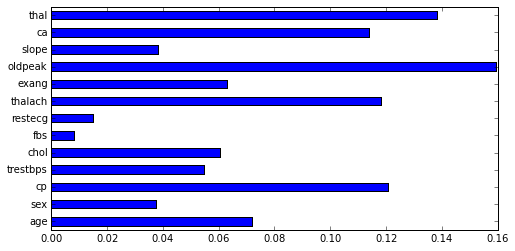

In [165]:

%matplotlib inline
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({'feature_importance':rfc.feature_importances_, 'feature_name':X.columns})
fig = plt.figure(figsize=(8,4))
ax  = plt.axes()
_   = feature_importance['feature_importance'].plot(kind='barh')
_   = ax.set_yticklabels(feature_importance.feature_name)

#### Plot Feature importances

#### Bonus: Repeat the classification with Support Vector Machine